In [ ]:
!pip3 install keras
!pip3 install tensorflow

![Drag Racing](https://i.ytimg.com/vi/MGS--dDzVr8/maxresdefault.jpg)

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 64, 64


df_cat = pd.read_csv('./catordog/cat.csv',header=None).apply(pd.to_numeric)
df_dog = pd.read_csv('./catordog/dog.csv',header=None).apply(pd.to_numeric)
print(df_cat[0].describe())

num_cats = df_cat.values.shape[1]
num_dogs = df_dog.values.shape[1]
print("Cats:{} Dogs:{}".format(num_cats, num_dogs))

cats = df_cat.values.reshape((img_rows, img_cols, num_cats))
dogs = df_dog.values.reshape((img_rows, img_cols, num_dogs))
X = np.concatenate((cats,dogs), axis=2).swapaxes(2,0)
y = np.concatenate((np.zeros(num_cats),np.ones(num_dogs)))
print("Shapes X={} y={}".format(X.shape,y.shape))

count    4096.000000
mean       58.609619
std        63.548593
min         4.000000
25%        10.000000
50%        47.000000
75%        77.000000
max       248.000000
Name: 0, dtype: float64
Cats:80 Dogs:80
Shapes X=(160, 64, 64) y=(160,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Prepare data to feed the NN
num_classes = 2


# Ask keras which format to use depending on used backend and arrange data as expected
if K.image_data_format() == 'channels_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Incoming data is in uint8. Cast the input data images to be floats in range [0.0-1.0]  
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (128, 64, 64, 1)
128 train samples
32 test samples


In [5]:
## This is the neural network proposed architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# Fit the NN
batch_size = 20
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 128 samples, validate on 32 samples
Epoch 1/10
128/128 [==============================] - 2s 14ms/step - loss: 0.1722 - acc: 0.9453 - val_loss: 0.4644 - val_acc: 0.8438
Epoch 2/10
128/128 [==============================] - 2s 13ms/step - loss: 0.1317 - acc: 0.9688 - val_loss: 0.2763 - val_acc: 0.8750
Epoch 3/10
128/128 [==============================] - 2s 15ms/step - loss: 0.0846 - acc: 0.9766 - val_loss: 0.2475 - val_acc: 0.8125
Epoch 4/10
128/128 [==============================] - 2s 15ms/step - loss: 0.0700 - acc: 0.9922 - val_loss: 0.2690 - val_acc: 0.8750
Epoch 5/10
128/128 [==============================] - 2s 14ms/step - loss: 0.0410 - acc: 0.9922 - val_loss: 0.2648 - val_acc: 0.8438
Epoch 6/10
128/128 [==============================] - 2s 13ms/step - loss: 0.0453 - acc: 0.9922 - val_loss: 0.1839 - val_acc: 0.8750
Epoch 7/10
128/128 [==============================] - 2s 15ms/step - loss: 0.0204 - acc: 0.9922 - val_loss: 0.1845 - val_acc: 0.9062
Epoch 8/10
128/128 [====

In [8]:
# Evaluate the model with test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.18458375334739685
Test accuracy: 0.875


Probs -> Cat:0.00822 Dog:0.99178


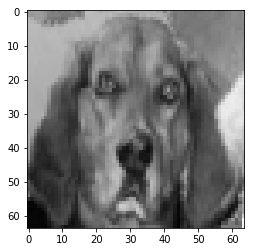

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
img = X_test[30]
pred = model.predict(np.expand_dims(img,axis=0))[0]
print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred[0],pred[1]))
plt.imshow(Image.fromarray(img.squeeze()*255),'gray')

Probs -> Cat:0.00822 Dog:0.99178


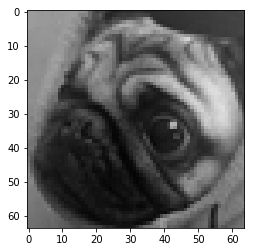

In [48]:
df = pd.read_csv("~/Downloads/potacho2.csv",header=None).apply(pd.to_numeric)
img2 = df.values.reshape((64,64,1)).astype('float32') / 255
plt.imshow(Image.fromarray(img2.squeeze()*255),'gray')
pred2 = model.predict(np.expand_dims(img,axis=0))[0]
print("Probs -> Cat:{0:.5f} Dog:{1:.5f}".format(pred2[0],pred2[1]))
